In [1]:
import numpy as np
import sympy as sp

import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, fixed

import math

from graphObjects import kmPoint, kmVector, kmLine, kmSegment

In [2]:
test_arr = np.array([1,1])

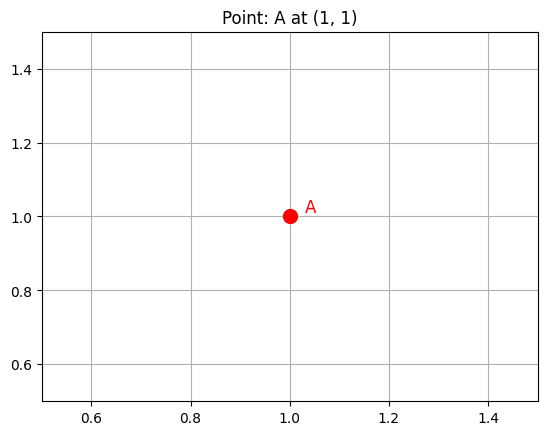

kmPoint(id=A, coord=(1, 1))

In [3]:
kmPoint(test_arr, "A")

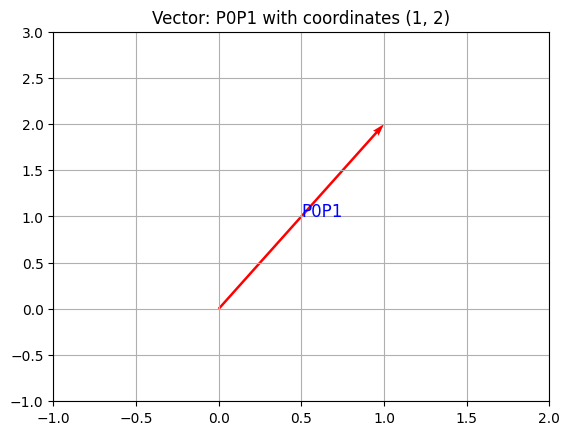

kmVector(id=P0P1, coord=(1, 2))

In [4]:
P0 = kmPoint((1, 1), "P0")
P1 = kmPoint((2, 3), "P1")
vector1 = kmVector.from_points(P0, P1)
vector1

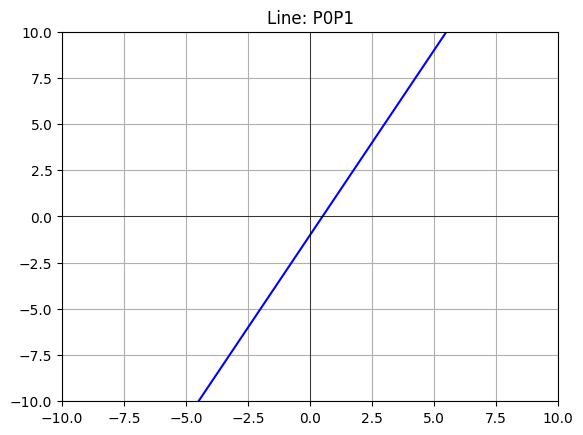

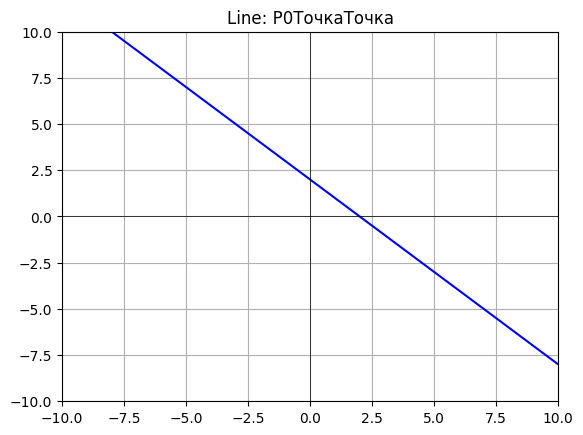

(kmLine(id=P0P1, coef=(-2, 1, 1)), kmLine(id=P0ТочкаТочка, coef=(3, 3, -6)))

In [5]:
line1 = kmLine.from_points(P0, P1)
line2 = kmLine.from_point_and_vector(P0, kmVector.from_points(kmPoint([1,7]), kmPoint([4,4])))
line1, line2

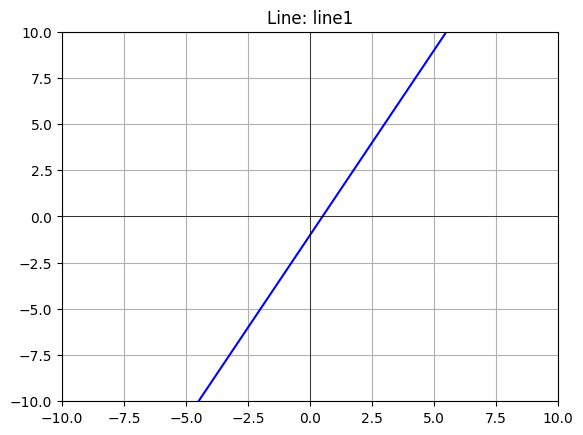

kmLine(id=line1, coef=(-2, 1, 1))

In [6]:
line1._id = "line1"
line1

# 1

## 1.1

Спроектируйте и реализуйте в стиле существующей структуры системы
kmGeom2D
- объект «отрезок на плоскости», его внутреннее представление;
- конструкторы объекта «отрезок на плоскости»;
- функции, вычисляющие свойства объекта «отрезок на плоскости»;
- функцию, создающую графический образ объекта «отрезок на плоскости».

Напишите спецификации созданных функций: имя, входные аргументы, что
вычисляет, в каком виде возвращает результат вычислений.
Функции тестировать на примерах. 

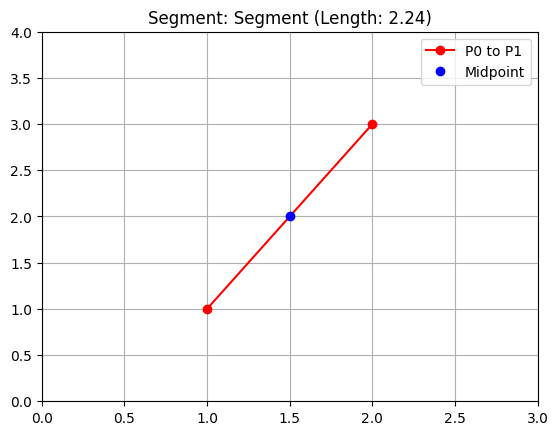

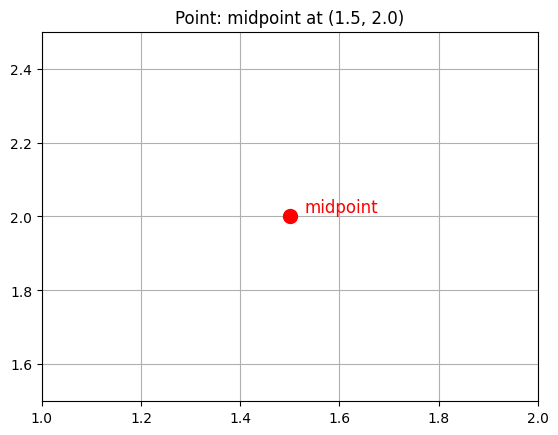

(kmSegment(id=Segment, P1=(1, 1), P2=(2, 3), length=2.24),
 2.23606797749979,
 kmPoint(id=midpoint, coord=(1.5, 2.0)))

In [7]:
segment = kmSegment(P0, P1)
segment, segment.length, segment.midpoint

## 1.2

Реализуйте следующие функции


a) запрос свойства прямой: ее параметрическое уравнение (идентификатор
“equParam”);


b)запрос свойства прямой: ее направляющий вектор (идентификатор “dir”);


c) запрос свойства прямой: ее нормальный вектор (идентификатор “norm”);


d) конструктор точки p, лежащей на прямой Lab, несущей отрезок ab. Заданы
отрезок ab и значение параметра точки p, причем параметризация прямой
Lab, такова, что параметр на концах отрезка a и b имеет значения 0 и 1,
соответственно.


e) конструктор прямой: задан объект «отрезок на плоскости», построить
объект «прямая на плоскости», которой принадлежит этот отрезок (т.е.
построить прямую, несущую этот отрезок).


f) конструктор отрезка: задано параметрическое уравнение прямой, несущей
отрезок, и значения параметров в точках-концах отрезка (возможно,
направленного);

In [8]:
line1.equation() # a)

'-2x + 1y + 1 = 0'

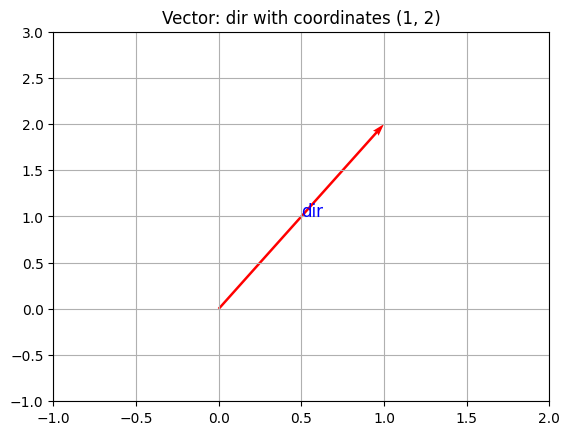

(graphObjects.kmVector, kmVector(id=dir, coord=(1, 2)))

In [9]:
v = line1.direction_vector
type(v), v # b)

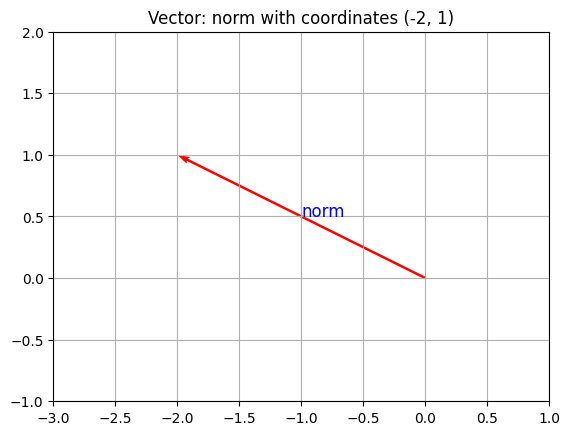

(graphObjects.kmVector, kmVector(id=norm, coord=(-2, 1)))

In [10]:
v = line1.normal_vector
type(v), v # c)

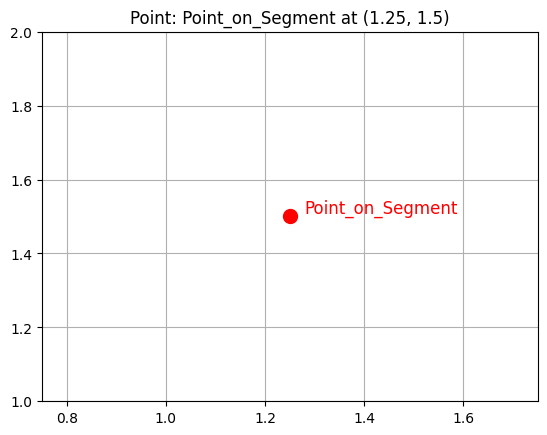

kmPoint(id=Point_on_Segment, coord=(1.25, 1.5))

In [11]:
# d)
pos = kmPoint.from_segment(segment, t=0.25)
pos

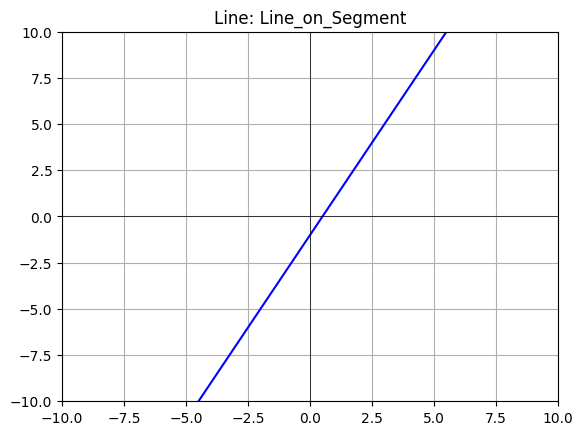

kmLine(id=Line_on_Segment, coef=(2, -1, -1))

In [12]:
# e)
line = kmLine.from_segment(segment)
line

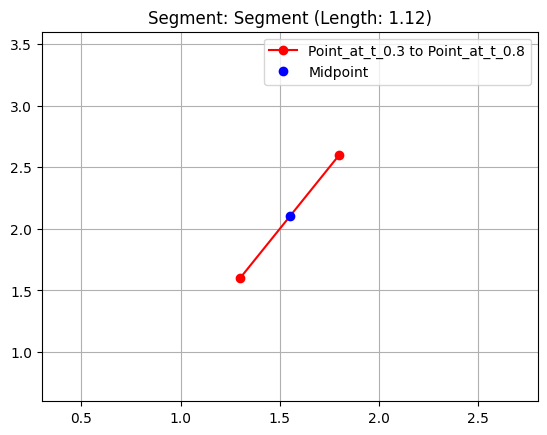

kmSegment(id=Segment, P1=(1.3, 1.6), P2=(1.8, 2.6), length=1.12)

In [13]:
# f)
segment = kmSegment.from_parametric(P0, P1, 0.3, 0.8)
segment

# 2

## 2.1

Напишите функцию, тестирующую расположение двух различных точек
плоскости относительно заданной прямой. Отобразите заданные объекты с
возможностью динамической визуализации. Предусмотрите варианты
описания результатов, располагая их над графической областью:
- «обе точки <координаты точек> лежат на прямой <общее уравнение
прямой>»,
- «точка <координаты точки> принадлежит, точка <координаты точки> не
принадлежит прямой <общее уравнение прямой>»,
- «точки <координаты точек> лежат по одну сторону от прямой <общее
уравнение прямой>»,
- «точки <координаты точек> лежат по разные стороны от прямой <общее
уравнение прямой>». 


In [14]:
def point_relative_to_line(line, point):
    """
    Проверяет положение точки относительно прямой, используя коэффициенты прямой.

    Уравнение прямой: Ax + By + C = 0
    Для проверки подставляем координаты точки в уравнение:
    значение = A*x + B*y + C

    :line: Экземпляр класса kmLine, задающий прямую.
    :point: Экземпляр класса kmPoint, задающий точку.
    :return: Значение подстановки координат в уравнение (положительное, отрицательное или ноль).
    """
    A, B, C = line.coef  # коэффициенты уравнения прямой
    x, y = point.coord  # координаты точки
    return A * x + B * y + C

def test_two_points_and_line(P1, P2, line):
    """
    Тестирует расположение двух точек относительно заданной прямой.

    :P1: Экземпляр класса kmPoint (первая точка).
    :P2: Экземпляр класса kmPoint (вторая точка).
    :line: Экземпляр класса kmLine (прямая).
    :return: Сообщение о положении точек относительно прямой.
    """
    # Подставляем точки в уравнение прямой
    value1 = point_relative_to_line(line, P1)
    value2 = point_relative_to_line(line, P2)

    if value1 == 0 and value2 == 0:
        return f"Обе точки {P1.coord} и {P2.coord} лежат на прямой {line.equation()}"
    elif value1 == 0:
        return f"Точка {P1.coord} лежит на прямой, точка {P2.coord} не принадлежит прямой {line.equation()}"
    elif value2 == 0:
        return f"Точка {P2.coord} лежит на прямой, точка {P1.coord} не принадлежит прямой {line.equation()}"
    elif value1 * value2 > 0:
        return f"Точки {P1.coord} и {P2.coord} лежат по одну сторону от прямой {line.equation()}"
    else:
        return f"Точки {P1.coord} и {P2.coord} лежат по разные стороны от прямой {line.equation()}"

def visualize_test(P1, P2, line):
    """
    Визуализирует положение двух точек относительно прямой.
    :P1: Экземпляр класса kmPoint (первая точка).
    :P2: Экземпляр класса kmPoint (вторая точка).
    :line: Экземпляр класса kmLine (прямая).
    """
    fig, ax = plt.subplots()

    # Рисуем прямую
    x_vals = np.linspace(-10, 10, 400)
    y_vals = (-line.coef[0] * x_vals - line.coef[2]) / line.coef[1]
    ax.plot(x_vals, y_vals, label=f"Прямая: {line.equation()}", color="blue")

    # Рисуем точки
    ax.scatter(*P1.coord, color='red', label=f"Точка P1 {P1.coord}")
    ax.scatter(*P2.coord, color='green', label=f"Точка P2 {P2.coord}")

    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.set_aspect('equal', 'box')
    ax.grid(True)
    ax.legend()

    result_text = test_two_points_and_line(P1, P2, line)
    plt.title(result_text)
    plt.show()

def dynamic_visualization(x1, y1, x2, y2, A, B, C):
    # Создаем точки и прямую
    P1 = kmPoint([x1, y1], id="P1")
    P2 = kmPoint([x2, y2], id="P2")
    line = kmLine([A, B, C], id="L")  # Прямая: Ax + By + C = 0
    visualize_test(P1, P2, line)

interact(dynamic_visualization,
         x1=FloatSlider(min=-10, max=10, step=0.1, value=2, description='X1'),
         y1=FloatSlider(min=-10, max=10, step=0.1, value=3, description='Y1'),
         x2=FloatSlider(min=-10, max=10, step=0.1, value=4, description='X2'),
         y2=FloatSlider(min=-10, max=10, step=0.1, value=6, description='Y2'),
         A=FloatSlider(min=-5, max=5, step=0.1, value=1, description='A'),
         B=FloatSlider(min=-5, max=5, step=0.1, value=-1, description='B'),
         C=FloatSlider(min=-5, max=5, step=0.1, value=1, description='C'))

interactive(children=(FloatSlider(value=2.0, description='X1', max=10.0, min=-10.0), FloatSlider(value=3.0, de…

<function __main__.dynamic_visualization(x1, y1, x2, y2, A, B, C)>

## 2.2

Напишите функцию kmDistance[P1, P2], вычисляющую расстояние
между двумя точками P1 и P2. 

In [15]:
def kmDistance(P1, P2):
    """
    Вычисляет расстояние между двумя точками P1 и P2.
    :P1 -- объект класса kmPoint
    :P2 -- объект класса kmPoint
    :return: -- расстояние между P1 и P2
    """
    x1, y1 = P1.coord
    x2, y2 = P2.coord
    distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    return distance

In [16]:
kmDistance(P0, P1)

2.23606797749979

## 2.3

Напишите функцию kmDistance[L, P], вычисляющую ориентированное
расстояние (со своим знаком) от точки P до прямой L на плоскости.

In [17]:
def kmDistance(line, point):
    """
    Вычисляет ориентированное расстояние от точки P до прямой L.
    :L -- объект класса kmLine
    :P -- объект класса kmPoint
    :return: -- ориентированное расстояние от P до L
    """
    a,b,c = line.coef
    x0,y0 = point.coord
    distance = (a * x0 + b * y0 + c) / math.sqrt(a**2 + b**2)

    return distance

In [18]:
L = kmLine([3, 4, 5])
P = kmPoint([1, 2])
distance = kmDistance(L, P)
distance

3.2

## 2.4

Постройте интерактивный графический объект, отображающий задаваемую
динамически точку P и статическую прямую L на плоскости, и указывающий
расстояние от точки до прямой. Точка P изменяет свои координаты
посредством элемента управления Locator и изменяет цвет в зависимости от
принадлежности одной из полуплоскостей, порождаемых прямой L.

In [19]:
# Функция для вычисления ориентированного расстояния от точки до прямой
def kdistance(L, P):
    A, B, C = L
    x0, y0 = P
    distance = (A * x0 + B * y0 + C) / np.sqrt(A**2 + B**2)
    return distance

# Функция для интерактивного отображения прямой и изменяющейся точки
def plot_interactive(line, x0, y0):
    """
    Интерактивная функция для отображения прямой и точки с изменяющимися координатами.

    :line -- коэффициенты прямой [A, B, C], где Ax + By + C = 0
    :x0, y0 -- координаты точки
    """
    A, B, C = line
    x_vals = np.linspace(-10, 10, 400)
    y_vals = -(A * x_vals + C) / B

    plt.figure(figsize=(6, 6))
    plt.plot(x_vals, y_vals, label="Прямая L", color='black')

    P = [x0, y0]
    distance = kdistance(line, P)
    color = 'blue' if distance > 0 else 'red' if distance < 0 else 'green'

    plt.scatter([x0], [y0], color=color, s=100)
    plt.text(x0 + 0.5, y0, f"d = {distance:.2f}", fontsize=12, color='black')
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.axhline(0, color='grey', lw=0.5)
    plt.axvline(0, color='grey', lw=0.5)
    plt.grid(True)
    plt.title(f"Ориентированное расстояние: {distance:.2f}")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.show()


In [20]:
line = kmLine([3, 4, 5])

# Интерфейс с ползунками для изменения координат точки
interact(plot_interactive,
         line=fixed(line.coef),
         x0=FloatSlider(min=-10, max=10, step=0.1, value=1, description="X0"),
         y0=FloatSlider(min=-10, max=10, step=0.1, value=1, description="Y0"))

interactive(children=(FloatSlider(value=1.0, description='X0', max=10.0, min=-10.0), FloatSlider(value=1.0, de…

<function __main__.plot_interactive(line, x0, y0)>

## 2.5

Напишите функцию kmDistance[L1, L2], вычисляющую расстояние
между двумя параллельными прямыми L1 и L2.

In [21]:
def kmDistance(L1, L2):
    """
    Функция для вычисления расстояния между двумя параллельными прямыми L1 и L2.

    :L1: объект kmLine, представляющий первую прямую
    :L2: объект kmLine, представляющий вторую прямую
    :return: расстояние между прямыми L1 и L2
    """
    A1, B1, C1 = L1.coef
    A2, B2, C2 = L2.coef
    # Проверка на параллельность
    if A1 * B2 != A2 * B1:
        raise ValueError("Прямые не параллельны")
    distance = abs(C2 - C1) / np.sqrt(A1**2 + B1**2)
    return distance

In [22]:
L1 = kmLine([3, 4, 5])  # 3x + 4y + 5 = 0
L2 = kmLine([3, 4, 11])  # 3x + 4y + 9 = 0
try:
    distance = kmDistance(L1, L2)
    print(f"Расстояние между прямыми: {distance:.2f}")
except ValueError as e:
    print(e)

Расстояние между прямыми: 1.20


## 2.6

Напишите функцию kmPoint[L1, L2], определяющую взаимное
расположение двух прямых L1 и L2 на плоскости. 

In [23]:
def determine_position(L1, L2):
    """
    Определяет взаимное расположение двух прямых L1 и L2.

    :L1: объект kmLine, представляющий первую прямую
    :L2: объект kmLine, представляющий вторую прямую
    :return: строка с результатом взаимного расположения
    """
    A1, B1, C1 = L1.coef
    A2, B2, C2 = L2.coef
    
    if (A1 * B2 == A2 * B1) and (C1 * B2 == C2 * B1):
        return "Прямые совпадают."
    elif A1 * B2 == A2 * B1:
        return "Прямые параллельны."
    else:
        return "Прямые пересекаются."

In [24]:
L1 = kmLine([3, 4, 5])  # 3x + 4y + 5 = 0
L2 = kmLine([3, 4, 9])  # 3x + 4y + 9 = 0 
L3 = kmLine([4, -3, 12])  # 4x - 3y + 12 = 0 
L4 = kmLine([4, -3, 12])  # 4x - 3y + 12 = 0 
determine_position(L1, L2),determine_position(L1, L3),determine_position(L3, L4)

('Прямые параллельны.', 'Прямые пересекаются.', 'Прямые совпадают.')

## 2.7

Постройте интерактивный графический объект, содержащий образы двух
прямых на плоскости L1 и L2 и точки P пересечения этих прямых, если она
существует. Каждая прямая L1 и L2, задается динамически, двумя
различными точками. Изменение координат каждой задаваемой точки
обеспечивает элемент управления Locator. 

In [25]:
def find_intersection(L1, L2):
    A1, B1, C1 = L1.coef
    A2, B2, C2 = L2.coef
    
    # Если L1 и L2 параллельны, нет точки пересечения
    if A1 * B2 == A2 * B1:
        return None
    
    # Используем метод Крамера для нахождения точки пересечения
    det = A1 * B2 - A2 * B1
    x = (B1 * C2 - B2 * C1) / det
    y = (A2 * C1 - A1 * C2) / det
    return kmPoint(coord=(x, y))
    
def plot_lines_and_intersection(p1_x, p1_y, p2_x, p2_y, p3_x, p3_y, p4_x, p4_y):
    p1 = kmPoint([p1_x, p1_y])
    p2 = kmPoint([p2_x, p2_y])
    p3 = kmPoint([p3_x, p3_y])
    p4 = kmPoint([p4_x, p4_y])

    # Создаем прямые L1 и L2
    L1 = kmLine.from_points(p1, p2)
    L2 = kmLine.from_points(p3, p4)
    
    intersection = find_intersection(L1, L2)

    # Настройка графика
    plt.figure(figsize=(8, 8))
    x_vals = np.linspace(-10, 10, 400)
    
    # Прямая L1
    y_vals_L1 = -(L1.coef[0] * x_vals + L1.coef[2]) / L1.coef[1]
    plt.plot(x_vals, y_vals_L1, label="L1", color='blue')

    # Прямая L2
    y_vals_L2 = -(L2.coef[0] * x_vals + L2.coef[2]) / L2.coef[1]
    plt.plot(x_vals, y_vals_L2, label="L2", color='orange')

    # Рисуем точки
    plt.scatter([p1.coord[0], p2.coord[0], p3.coord[0], p4.coord[0]],
                [p1.coord[1], p2.coord[1], p3.coord[1], p4.coord[1]],
                color='red', s=100)

    # Точка пересечения
    if intersection is not None:
        plt.scatter(intersection.coord[0], intersection.coord[1], color='green', s=100, label="Intersection")
        plt.text(intersection.coord[0] + 0.5, intersection.coord[1], f"Intersection: {intersection.coord}", fontsize=12, color='green')

    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.axhline(0, color='grey', lw=0.5)
    plt.axvline(0, color='grey', lw=0.5)
    plt.grid(True)
    plt.title("Динамическое отображение прямых и их пересечения")
    plt.legend()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

In [26]:
interact(plot_lines_and_intersection,
         p1_x=FloatSlider(min=-10, max=10, step=0.1, value=1, description='P1 X'),
         p1_y=FloatSlider(min=-10, max=10, step=0.1, value=2, description='P1 Y'),
         p2_x=FloatSlider(min=-10, max=10, step=0.1, value=3, description='P2 X'),
         p2_y=FloatSlider(min=-10, max=10, step=0.1, value=4, description='P2 Y'),
         p3_x=FloatSlider(min=-10, max=10, step=0.1, value=1, description='P3 X'),
         p3_y=FloatSlider(min=-10, max=10, step=0.1, value=-2, description='P3 Y'),
         p4_x=FloatSlider(min=-10, max=10, step=0.1, value=3, description='P4 X'),
         p4_y=FloatSlider(min=-10, max=10, step=0.1, value=-4, description='P4 Y'))

interactive(children=(FloatSlider(value=1.0, description='P1 X', max=10.0, min=-10.0), FloatSlider(value=2.0, …

<function __main__.plot_lines_and_intersection(p1_x, p1_y, p2_x, p2_y, p3_x, p3_y, p4_x, p4_y)>

# 3

## 3.1

Напишите булеву функцию PointOnLineQ[P_kmPoint,
ab_kmSegment], которая определяет принадлежность заданной точки
прямой, несущей заданный отрезок. 

In [27]:
def PointOnLineQ(p, segment):
    """
    Определяет, принадлежит ли точка p прямой, несущей отрезок ab.

    :p: точка, которую нужно проверить
    :ab: отрезок, определяющий прямую
    :return: True, если точка принадлежит прямой, иначе False
    """
    # Получаем координаты точек отрезка
    x1, y1 = segment.P1.coord
    x2, y2 = segment.P2.coord
    x, y = p.coord
    
    # Уравнение прямой Ax + By + C = 0
    A = y2 - y1
    B = x1 - x2
    C = x2 * y1 - x1 * y2
    
    # Проверка принадлежности точки прямой
    return np.isclose(A * x + B * y + C, 0)

In [28]:
p = kmPoint((2, 3))
p1 = kmPoint((1, 1))
p2 = kmPoint((4, 4))

p_ = kmPoint((3, 3))

segment = kmSegment(p1, p2)

PointOnLineQ(p, segment), PointOnLineQ(p_, segment)


(False, True)

## 3.2

Напишите функцию kmPoint[L1, L2], определяющую взаимное
расположение двух прямых L1 и L2 на плоскости.
Результат вычисления функции:
- объект «точка на плоскости» – прямые пересекаются;
- 0 – прямые параллельны;
- объект «прямая на плоскости» – прямые совпадают.

In [29]:
def between_lines(L1, L2):
    """
    Определяет взаимное расположение двух прямых L1 и L2.

    :L1: экземпляр kmLine, представляющий первую прямую
    :L2: экземпляр kmLine, представляющий вторую прямую
    :return: экземпляр kmPoint (точка пересечения), 0 (параллельные) или экземпляр kmLine (совпадающие)
    """
    A1, B1, C1 = L1.coef
    A2, B2, C2 = L2.coef

    # Определяем определитель
    det = A1 * B2 - A2 * B1

    if np.isclose(det, 0):  # Параллельные или совпадающие прямые
        if np.isclose(C1 * B2, C2 * B1):  # Совпадающие
            return kmLine([A1, B1, C1])  # Возвращаем совпадающую прямую
        else:  # Параллельные
            return 0

    # Прямые пересекаются, находим точку пересечения
    x = (B1 * C2 - B2 * C1) / det
    y = (A2 * C1 - A1 * C2) / det
    return kmPoint([x, y])  # Возвращаем точку пересечения


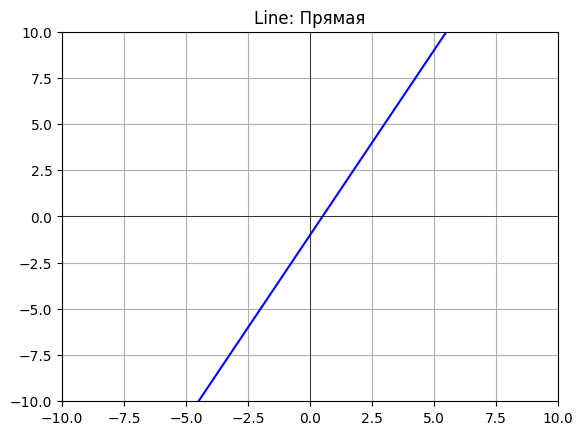

kmLine(id=Прямая, coef=(2, -1, -1))

In [30]:
L1 = kmLine([2, -1, -1])  # Прямая 2x - y - 1 = 0
L2 = kmLine([2, -1, -1])  # Прямая x - 2y - 2 = 0

between_lines(L1, L2)

## 3.3

Напишите функцию kmPoint[L, ab], определяющую взаимное
расположение прямой L и отрезка ab на плоскости.
Результат вычисления функции:
- объект «точка на плоскости» – прямая и отрезок пересекаются в
единственной точке;
- 0 – прямая L параллельна прямой, несущей отрезок ab;
объект «отрезок на плоскости» – отрезок лежит на прямой L;
- 2 – прямая L пересекает прямую, несущую отрезок ab, и не имеет общих
точек с отрезком. 

In [31]:
def between_line_and_segment(L, ab):
    """
    Определяет взаимное расположение прямой L и отрезка ab.

    :L: экземпляр kmLine, представляющий прямую
    :ab: экземпляр kmSegment, представляющий отрезок
    :return: экземпляр kmPoint (точка пересечения), 0 (параллельные) или экземпляр kmSegment (отрезок лежит на прямой)
            или 2 (пересекает, но не имеет общих точек)
    """
    A, B, C = L.coef
    p1 = ab.P1.coord
    p2 = ab.P2.coord

    # Уравнение отрезка в виде Ax + By + C = 0
    A_segment = p2[1] - p1[1]
    B_segment = p1[0] - p2[0]
    C_segment = A_segment * p1[0] + B_segment * p1[1]

    # Определяем определитель
    det = A * A_segment + B * B_segment

    if np.isclose(det, 0):  # Параллельные прямые
        # Проверяем, лежит ли отрезок на прямой
        if np.isclose(C_segment, C):  # Отрезок лежит на прямой L
            return ab
        else:  # Прямые параллельны
            return 0

    # Прямые пересекаются, находим точку пересечения
    x = (B_segment * C - B * C_segment) / det
    y = (A * C_segment - A_segment * C) / det
    intersection = kmPoint([x, y])  # Точка пересечения

    # Проверяем, лежит ли точка пересечения на отрезке
    if min(p1[0], p2[0]) <= x <= max(p1[0], p2[0]) and min(p1[1], p2[1]) <= y <= max(p1[1], p2[1]):
        return intersection  # Прямая и отрезок пересекаются
    else:
        return 2  # Прямая пересекает прямую, несущую отрезок, но не имеет общих точек


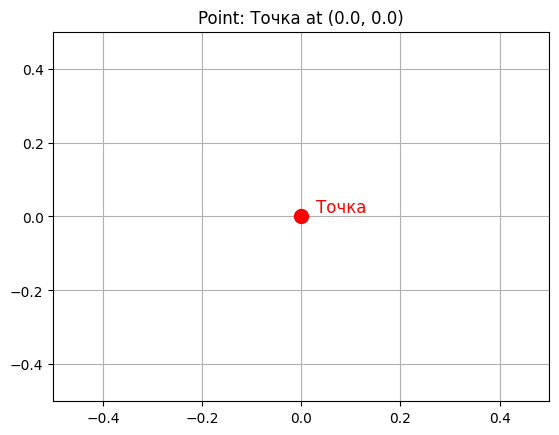

kmPoint(id=Точка, coord=(0.0, 0.0))

In [32]:
L = kmLine([1, -1, 0])
segment = kmSegment(kmPoint([0, 0]), kmPoint([2, 2])) 
between_line_and_segment(L, segment)

## 3.4

Напишите функцию-запрос свойства «положение отрезка ab относительно
точки p, лежащей на прямой Lab, несущей отрезок ab». Функция вычисляет
значение параметра точки p в случае, когда параметризованная прямая Lab
имеет значения параметров 0 и 1 на концах отрезка a и b, соответственно.

In [33]:
def position_of_point_on_segment(p, ab):
    """
    Определяет положение точки p относительно отрезка ab.

    :p: экземпляр kmPoint, точка на прямой L_ab
    :ab: экземпляр kmSegment, отрезок
    :return: значение параметра t, которое определяет положение точки p относительно отрезка ab.
    """
    # Координаты концов отрезка
    a = ab.P1.coord
    b = ab.P2.coord

    # Вектор от a до b
    ab_vector = b - a

    # Вектор от a до p
    ap_vector = p.coord - a

    # Вычисляем значение параметра t
    # Проекция вектора ap на вектор ab
    t = np.dot(ap_vector, ab_vector) / np.dot(ab_vector, ab_vector)

    return t

In [34]:
segment = kmSegment(kmPoint([0, 0]), kmPoint([2, 2]))
point_on_line = kmPoint([1, 1])
t = position_of_point_on_segment(point_on_line, segment)
t

0.5

## 3.5

На плоскости заданы отрезок ab и точка p, лежащая на прямой Lab, несущей
этот отрезок. Напишите функцию, которая определяет положение точки p
относительно отрезка ab.


Варианты ответов: точка p, лежащая на прямой Lab,
- 0 - совпадает с точкой a;
- 1 - совпадает с точкой b;
- 2 - лежит на отрезке ab между точками a и b;
- -1 - лежит вне отрезка ab на луче с началом в точке a;
- 3 - лежит вне отрезка ab на луче с началом в точке b. 

In [35]:
def position_of_point_to_segment(p, ab):
    """
    Определяет положение точки p относительно отрезка ab.

    :param p: экземпляр kmPoint, точка p
    :param ab: экземпляр kmSegment, отрезок
    :return: целое число, описывающее положение точки p
    """
    a = ab.P1.coord
    b = ab.P2.coord

    # Вектор от a до b
    ab_vector = b - a
    ap_vector = p.coord - a
    bp_vector = p.coord - b

    # Параметр t для точки p на прямой L_ab
    t = np.dot(ap_vector, ab_vector) / np.dot(ab_vector, ab_vector)

    # Проверка на совпадение с концами
    if np.array_equal(p.coord, a):
        return 0  # Совпадает с точкой a
    elif np.array_equal(p.coord, b):
        return 1  # Совпадает с точкой b

    if 0 < t < 1:
        return 2
    elif t < 0:
        return -1 
    elif t > 1:
        return 3

In [36]:
segment = kmSegment(kmPoint((0, 0)), kmPoint((4, 4)))  # Отрезок от (0, 0) до (4, 4)
point_on_segment = kmPoint((2, 2), "A")  # Точка p, лежащая на отрезке
point_a = kmPoint((0, 0), "B")  # Точка p совпадает с точкой a
point_b = kmPoint((4, 4), "C")  # Точка p совпадает с точкой b
point_outside_a = kmPoint((-1, -1), "D")  # Точка p вне отрезка на луче с началом в a
point_outside_b = kmPoint((5, 5), "E")  # Точка p вне отрезка на луче с началом в b

# Проверяем положение точки относительно отрезка
for point in [point_on_segment, point_a, point_b, point_outside_a, point_outside_b]:
    result = position_of_point_to_segment(point, segment)
    print(f"Положение точки {point._id}: {result}")

Положение точки A: 2
Положение точки B: 0
Положение точки C: 1
Положение точки D: -1
Положение точки E: 3


## 3.6

Напишите функцию kmPoint[ab, cd], определяющую взаимное
расположение отрезка ab и отрезка cd на плоскости. Результат вычисления
функции:
- объект «точка на плоскости» – отрезки пересекаются в единственной точке;
- 0 – прямые, несущие отрезки, параллельны;
- 1 – отрезки лежат на одной прямой;
- 2 – отрезки лежат на пересекающихся прямых и не имеют общих точек. 

In [37]:
def between_segments(ab, cd):
    """
    Определяет взаимное расположение отрезков ab и cd на плоскости.
    
    :ab: отрезок ab
    :cd: отрезок cd
    :return: Точка пересечения, если отрезки пересекаются в одной точке;
             0, если прямые параллельны;
             1, если отрезки лежат на одной прямой;
             2, если прямые пересекаются, но отрезки не имеют общих точек.
    """
    
    # Прямая через точки ab
    ab_line = kmLine.from_segment(ab)
    A1, B1, C1 = ab_line.coef
    
    # Прямая через точки cd
    cd_line = kmLine.from_segment(cd)
    A2, B2, C2 = cd_line.coef
    
    # Проверяем взаимное расположение прямых
    intersection_result = between_lines(ab_line, cd_line)
    # print(f'{intersection_result}, "{ab.P1}"')
    if isinstance(intersection_result, kmPoint):
        # Прямые пересекаются в точке, проверим, лежит ли точка пересечения на обоих отрезках
        intersection_point = intersection_result
        
        if position_of_point_to_segment(intersection_point, ab) and position_of_point_to_segment(intersection_point, cd):
            return intersection_point
        else:
            return 2
    
    elif intersection_result == 0 or isinstance(intersection_result, kmLine):
        # Прямые параллельны, проверяем, совпадают ли отрезки
        if PointOnLineQ(cd.P1, ab) and PointOnLineQ(cd.P2, ab):
            return 1
        else:
            return 0

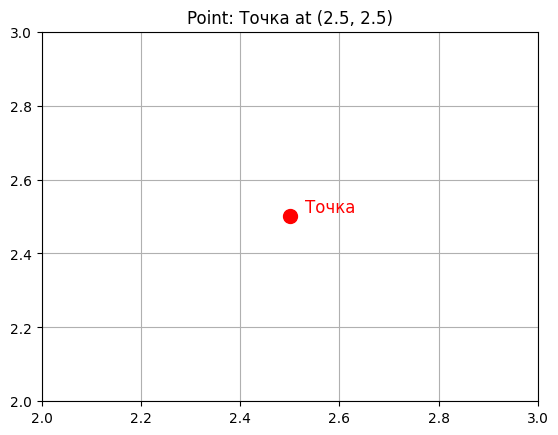

kmPoint(id=Точка, coord=(2.5, 2.5))
0
1
1


In [38]:
# Пример 1: Отрезки пересекаются в одной точке
ab = kmSegment(kmPoint((1, 1)), kmPoint((4, 4)))
cd = kmSegment(kmPoint((1, 4)), kmPoint((4, 1)))
result = between_segments(ab, cd)  # Ожидаемая точка пересечения
print(result)
# Пример 2: Прямые параллельны, отрезки не пересекаются
ab = kmSegment(kmPoint((0, 0)), kmPoint((2, 2)))
cd = kmSegment(kmPoint((0, 1)), kmPoint((2, 3)))
result = between_segments(ab, cd)  # Ожидаем 0
print(result)
# Пример 3: Отрезки лежат на одной прямой
ab = kmSegment(kmPoint((0, 0)), kmPoint((4, 4)))
cd = kmSegment(kmPoint((1, 1)), kmPoint((3, 3)))
result = between_segments(ab, cd)  # Ожидаем 1
print(result)
# Пример 4: Прямые пересекаются, но отрезки не имеют общих точек
ab = kmSegment(kmPoint((0, 0)), kmPoint((2, 2)))
cd = kmSegment(kmPoint((3, 3)), kmPoint((5, 5)))
result = between_segments(ab, cd)  # Ожидаем 2
print(result)

## 3.7

На плоскости заданы два отрезка, лежащие на пересекающихся прямых.
Напишите функцию, которая определяет значения параметров в точке q
пересечения прямых. Параметризации прямых таковы, что для каждой прямой
на концах отрезка соответствующий параметр принимает значения 0 и 1.

In [39]:
def find_intersection_params(segment1, segment2):
    """
    Находит параметры t1 и t2 для пересечения прямых, на которых лежат отрезки segment1 и segment2.
    Параметры t1 и t2 показывают положение точки пересечения относительно отрезков segment1 и segment2.
    
    :segment1: объект kmSegment (отрезок 1)
    :segment2: объект kmSegment (отрезок 2)
    :return: значения параметров t1 и t2, или None, None если прямые параллельны
    """
    
    # Извлекаем начальные и конечные точки каждого отрезка
    a = segment1.P1
    b = segment1.P2
    c = segment2.P1
    d = segment2.P2
    
    # Составляем систему уравнений для решения
    A = np.array([b.coord - a.coord, c.coord - d.coord]).T  # Матрица коэффициентов (векторы направления)
    b_vec = c.coord - a.coord  # Вектор правой части
    
    # Решаем систему уравнений A * [t1, t2] = b_vec
    t_values = np.linalg.solve(A, b_vec)
    t1, t2 = t_values
    return t1, t2

In [40]:
segment1 = kmSegment(kmPoint((0, 0)), kmPoint((4, 4)))  # Отрезок ab
segment2 = kmSegment(kmPoint((0, 4)), kmPoint((4, 0)))  # Отрезок cd

t1, t2 = find_intersection_params(segment1, segment2)
t1, t2

(0.5, 0.5)

## 3.8

Напишите функцию-конструктор произвольного отрезка, который
принадлежит заданной прямой на плоскости. 

In [41]:
def create_segment_on_line(line, length=1):
    """
    Создает отрезок произвольной длины, принадлежащий заданной прямой.

    :line: объект kmLine
    :length: длина отрезка
    :return: объект kmSegment
    """
    A,B,C = line.coef
    # Параметризация прямой. Находим две точки на прямой
    if B != 0:  # Если B не равно 0, можем взять x=0 для нахождения y
        x1 = 0
        y1 = -C / B  # y = (-C/B) когда x = 0
        x2 = length
        y2 = (-C - A * x2) / B  # y = (-C - A*x2) / B
    else:  # Если B равно 0, значит прямая вертикальная
        x1 = -C / A  # x = -C/A когда y = 0
        y1 = 0
        x2 = x1  # x координаты обеих точек совпадают
        y2 = y1 + length  # y увеличиваем на длину отрезка
    
    start_point = (x1, y1)
    end_point = (x2, y2)

    return kmSegment(kmPoint(start_point), kmPoint(end_point))

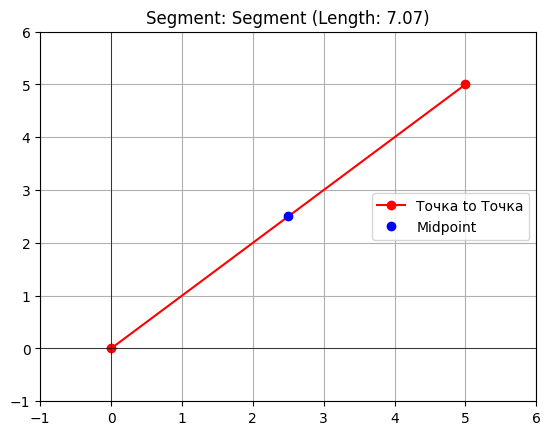

kmSegment(id=Segment, P1=(0.0, -0.0), P2=(5.0, 5.0), length=7.07)

In [42]:
line = kmLine((1, -1, 0))
segment = create_segment_on_line(line, length=5)
segment

## 3.9

Тестируйте функции из заданий 3.1 – 3.8.

# 4

## 4.1

Спроектируйте и реализуйте задачу логического пересечения двух списков
отрезков, отрезки принадлежат одной прямой.

In [43]:
def intersection(seg1, seg2):
    """
    Проверяет пересечение двух отрезков.
    
    :seg1: Первый отрезок (экземпляр kmSegment).
    :seg2: Второй отрезок (экземпляр kmSegment).
    :return: Отрезок пересечения (если есть) или None.
    """
    # Определяем координаты концов отрезков
    A1, A2 = seg1.P1.coord, seg1.P2.coord
    B1, B2 = seg2.P1.coord, seg2.P2.coord

    # Определение границ отрезков
    segment1_start = min(A1[0], A2[0]), min(A1[1], A2[1])
    segment1_end = max(A1[0], A2[0]), max(A1[1], A2[1])
    segment2_start = min(B1[0], B2[0]), min(B1[1], B2[1])
    segment2_end = max(B1[0], B2[0]), max(B1[1], B2[1])

    # Проверяем на отсутствие пересечения
    if segment1_end[0] < segment2_start[0] or segment2_end[0] < segment1_start[0]:
        return None  # Нет пересечения

    # Если пересечение есть, то определяем его
    intersection_start = max(segment1_start[0], segment2_start[0])
    intersection_end = min(segment1_end[0], segment2_end[0])

    return kmSegment(kmPoint((intersection_start, A1[1])), kmPoint((intersection_end, A1[1])))



In [44]:
def find_intersections(list1, list2):
    """
    Находит пересечения двух списков отрезков.
    
    :list1: Первый список отрезков.
    :list2: Второй список отрезков.
    :return: Список пересечений.
    """
    intersections = []

    for seg1 in list1:
        for seg2 in list2:
            inter_seg = intersection(seg1, seg2)
            if inter_seg:
                intersections.append(inter_seg)

    return intersections

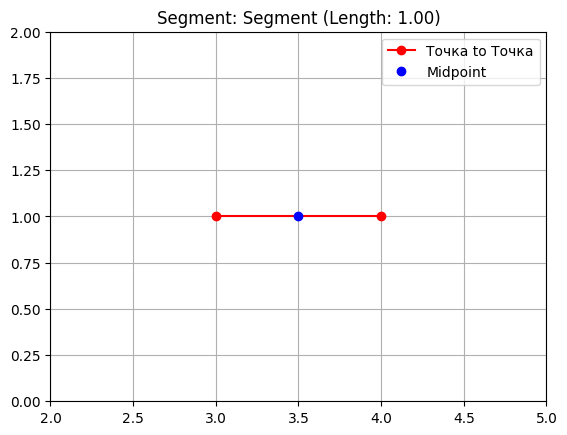

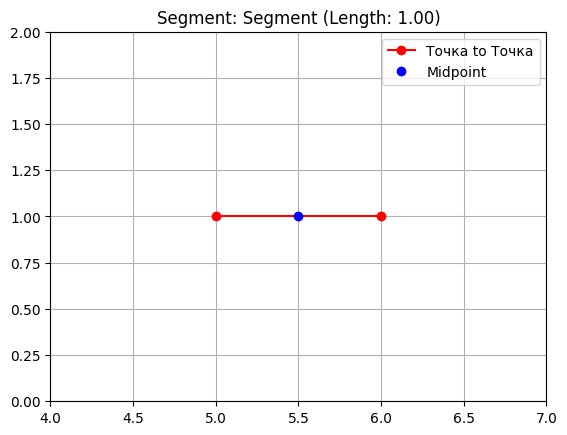

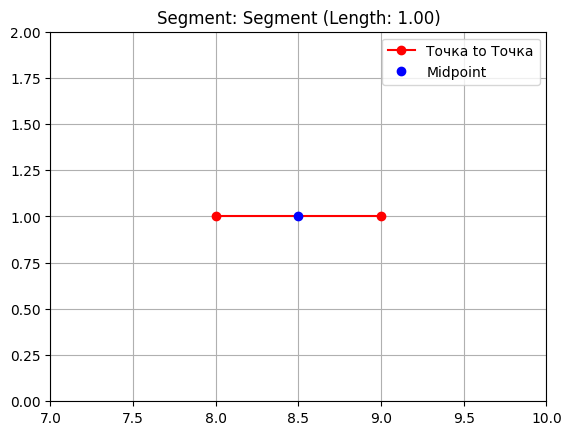

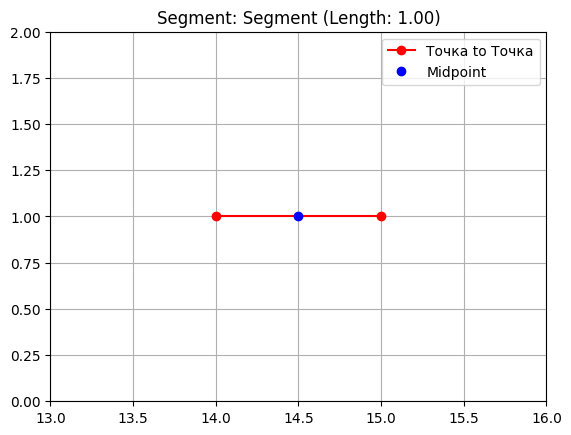

[kmSegment(id=Segment, P1=(3, 1), P2=(4, 1), length=1.00),
 kmSegment(id=Segment, P1=(5, 1), P2=(6, 1), length=1.00),
 kmSegment(id=Segment, P1=(8, 1), P2=(9, 1), length=1.00),
 kmSegment(id=Segment, P1=(14, 1), P2=(15, 1), length=1.00)]

In [45]:
segments_list1 = [
    kmSegment(kmPoint((1, 1)), kmPoint((4, 1)), id="Segment1"),
    kmSegment(kmPoint((5, 1)), kmPoint((10, 1)), id="Segment2"),
    kmSegment(kmPoint((12, 1)), kmPoint((15, 1)), id="Segment3")
]

segments_list2 = [
    kmSegment(kmPoint((3, 1)), kmPoint((6, 1)), id="Segment4"),
    kmSegment(kmPoint((8, 1)), kmPoint((9, 1)), id="Segment5"),
    kmSegment(kmPoint((14, 1)), kmPoint((16, 1)), id="Segment6")
]

intersections = find_intersections(segments_list1, segments_list2)
intersections

## 4.2

Спроектируйте и реализуйте задачу логического объединения двух списков
отрезков, отрезки принадлежат одной прямой. 

In [46]:
def merge_segments(list1, list2):
    """
    Логическое объединение двух списков отрезков, которые принадлежат одной прямой.
    
    :list1: Первый список отрезков.
    :list2: Второй список отрезков.
    :return: Новый список объединенных отрезков.
    """
    # Объединяем списки отрезков
    all_segments = [(seg.P1.coord, seg.P2.coord) for seg in (list1 + list2)]
    # Сортируем отрезки по начальной координате
    all_segments.sort(key=lambda segment: segment[0][0])  # Сортировка по x первой точки

    merged_segments = []
    current_start, current_end = None, None

    for (start, end) in all_segments:
        if current_start is None:
            current_start, current_end = start, end
        else:
            # Проверяем, пересекаются ли текущий и новый сегменты
            if start[0] <= current_end[0]:  # Если новый сегмент начинается до конца текущего
                current_end = (max(current_end[0], end[0]), current_end[1])  # Объединяем по x
            else:
                # Если нет пересечения, сохраняем текущий сегмент
                merged_segments.append(kmSegment(kmPoint(current_start), kmPoint(current_end)))
                current_start, current_end = start, end

    # Не забудьте добавить последний объединенный сегмент, если он существует
    if current_start is not None:
        merged_segments.append(kmSegment(kmPoint(current_start), kmPoint(current_end)))

    return merged_segments

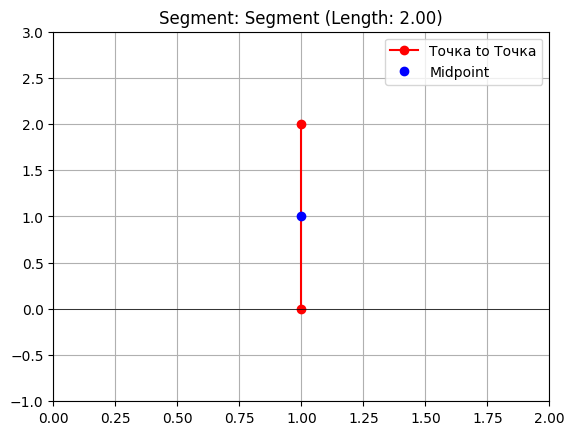

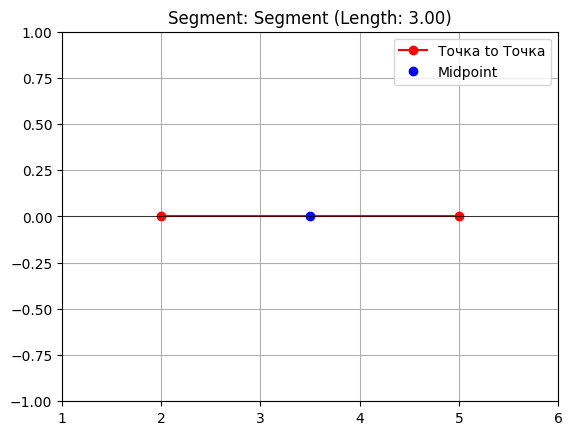

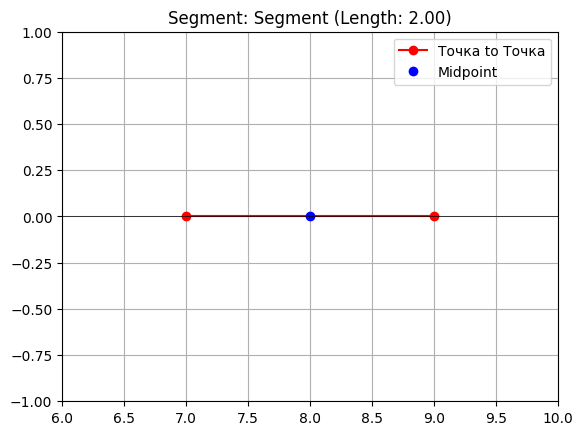

[kmSegment(id=Segment, P1=(1, 0), P2=(1, 2), length=2.00),
 kmSegment(id=Segment, P1=(2, 0), P2=(5, 0), length=3.00),
 kmSegment(id=Segment, P1=(7, 0), P2=(9, 0), length=2.00)]

In [47]:
segments_list1 = [
    kmSegment(kmPoint((1, 0)), kmPoint((1, 2)), id="Segment1"),
    kmSegment(kmPoint((4, 0)), kmPoint((5, 0)), id="Segment2"),
]

segments_list2 = [
    kmSegment(kmPoint((2, 0)), kmPoint((4, 0)), id="Segment3"),
    kmSegment(kmPoint((7, 0)), kmPoint((9, 0)), id="Segment4"),
]

merged_segments = merge_segments(segments_list1, segments_list2)
merged_segments

## 4.3

Спроектируйте и реализуйте задачу логического исключения отрезков списка
Ls2 из отрезков списка Ls1, отрезки лежат на одной прямой. 

In [48]:
def exclude_segments(Ls1, Ls2):
    """
    Логическое исключение отрезков списка Ls2 из отрезков списка Ls1.

    :Ls1: Первый список отрезков.
    :Ls2: Второй список отрезков.
    :return: Новый список отрезков, оставшихся после исключения.
    """
    # Находим пересечения
    intersections = find_intersections(Ls1, Ls2)
    
    # Если пересечений нет, просто возвращаем все отрезки из Ls1
    if not intersections:
        return Ls1

    excluded_segments = []

    # Обрабатываем каждый отрезок из Ls1
    for segment in Ls1:
        current_start = segment.P1.coord[0]
        current_end = segment.P2.coord[0]

        remaining_segments = [(current_start, current_end)]

        for inter_seg in intersections:
            inter_start = inter_seg.P1.coord[0]
            inter_end = inter_seg.P2.coord[0]

            new_remaining_segments = []
            for rem_start, rem_end in remaining_segments:
                # Если нет пересечения
                if inter_end <= rem_start or inter_start >= rem_end:
                    new_remaining_segments.append((rem_start, rem_end))
                else:
                    # Если есть пересечение, делим отрезок
                    if rem_start < inter_start:
                        new_remaining_segments.append((rem_start, inter_start))  # Левый отрезок
                    if rem_end > inter_end:
                        new_remaining_segments.append((inter_end, rem_end))  # Правый отрезок

            remaining_segments = new_remaining_segments

        # Добавляем оставшиеся действительные отрезки в список
        for rem_start, rem_end in remaining_segments:
            if rem_start < rem_end:  # Добавляем только действительные отрезки
                excluded_segments.append(kmSegment(kmPoint((rem_start, segment.P1.coord[1])), kmPoint((rem_end, segment.P1.coord[1]))))

    return excluded_segments

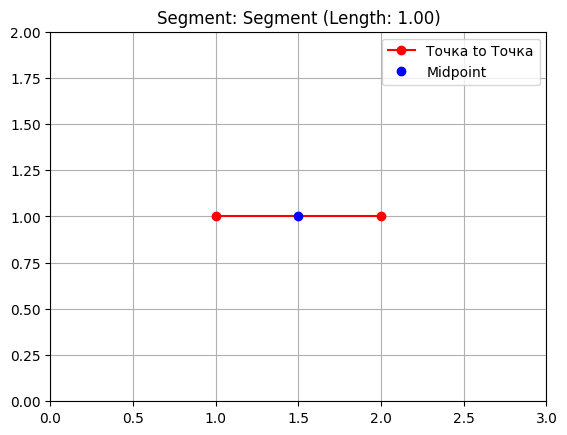

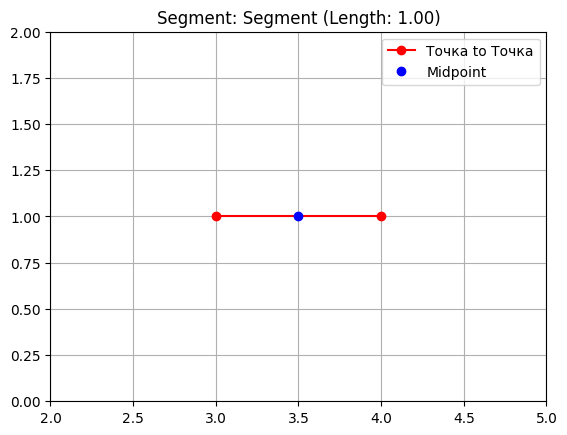

[kmSegment(id=Segment, P1=(1, 1), P2=(2, 1), length=1.00),
 kmSegment(id=Segment, P1=(3, 1), P2=(4, 1), length=1.00)]

In [49]:
seg1 = kmSegment(kmPoint((1, 1)), kmPoint((5, 5)))  # Отрезок от 1 до 5
seg2 = kmSegment(kmPoint((4, 4)), kmPoint((7, 7)))  # Отрезок от 2 до 3
seg3 = kmSegment(kmPoint((2, 2)), kmPoint((3, 3)))  # Отрезок от 4 до 6

result_segments = exclude_segments([seg1], [seg2, seg3])
result_segments